## Lectura

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# En figsize va ancho en pulgadas, y alto en pulgadas


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [141]:
mu = 0.6958
sigma = 0.02411

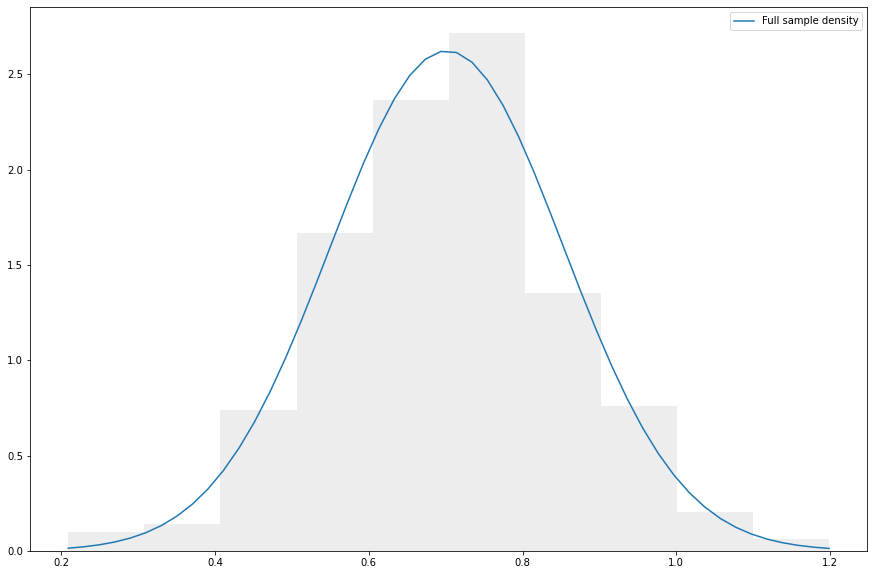

In [148]:
plt.figure(figsize=(15, 10))

simulate_normal = np.random.normal(mu, np.sqrt(sigma), 1000)
plt.hist(simulate_normal, color = "lightgrey", alpha = 0.4, density = True) # user 'density' en lugar de 'normed'
#plt.xlim(.3,1)
infer_x_axis = np.linspace(simulate_normal.min(), simulate_normal.max())

# Esta es la curva de densidad
plt.plot(
    infer_x_axis, # Se le da la misma escala que para el histograma en el eje X
    stats.norm.pdf(infer_x_axis, simulate_normal.mean(), simulate_normal.std()), # Se genera la curva de densidad empírica con stats.norm
    label = "Full sample density" # Etiqueta del gráfico de la curva
)

plt.legend()

## Uso de 'sample'

In [76]:
df = pd.DataFrame([
    {"nombre": "Neko", "edad": 17, "especie": "gato"}, 
    {"nombre": "Fantasma", "edad": 5, "especie": "erizo"}, 
    {"nombre": "Miti", "edad": 10, "especie": "gato"},
    {"nombre": "Bahamut", "edad": 1, "especie": "ratón"}, 
    {"nombre": "Maggie", "edad": 7, "especie": "perro"}, 
    {"nombre": "Alonso", "edad": 2, "especie": "perro"}
])
df

,nombre,edad,especie
0,Neko,17,gato
1,Fantasma,5,erizo
2,Miti,10,gato
3,Bahamut,1,ratón
4,Maggie,7,perro
5,Alonso,2,perro


In [77]:
df.sample(frac=0.2, random_state=123) # Ver documentación

,nombre,edad,especie
1,Fantasma,5,erizo


## Uso 'inplace' vs sobreescribir DF

In [78]:
lista_1 = [1,2]
lista_2 = lista_1.copy()

In [79]:
lista_2.pop()

2

In [80]:
lista_1

[1, 2]

In [81]:
copia_df = df.copy()

In [82]:
copia_df["nombre"].replace(["Neko"], ["neko"], inplace=True)
copia_df

,nombre,edad,especie
0,neko,17,gato
1,Fantasma,5,erizo
2,Miti,10,gato
3,Bahamut,1,ratón
4,Maggie,7,perro
5,Alonso,2,perro


In [83]:
oops = copia_df["nombre"].replace(["neko"], ["Neko"], inplace=True) # inplace retorna "None"
print(oops)

None


In [84]:
copia_df["nombre"] = copia_df["nombre"].replace(["neko"], ["Neko"]) # replace retorna una serie
copia_df

,nombre,edad,especie
0,Neko,17,gato
1,Fantasma,5,erizo
2,Miti,10,gato
3,Bahamut,1,ratón
4,Maggie,7,perro
5,Alonso,2,perro


## Repaso 'describe'

In [91]:
def mi_describe(dataframe):
    return dataframe.describe(), dataframe.describe(include=["O"])

In [92]:
desc_num, desc_cat = mi_describe(df)
desc_num

,edad
count,6.000000
mean,7.000000
std,5.899152
min,1.000000
25%,2.750000
50%,6.000000
75%,9.250000
max,17.000000


In [93]:
desc_cat

,nombre,especie
count,6,6
unique,6,4
top,Alonso,perro
freq,1,2


In [10]:
# A todo el DF
df.describe()

,edad
count,6.000000
mean,7.000000
std,5.899152
min,1.000000
25%,2.750000
50%,6.000000
75%,9.250000
max,17.000000


In [88]:
df.describe(include=["O"])

,nombre,especie
count,6,6
unique,6,4
top,Alonso,perro
freq,1,2


In [85]:
# A una columna numérica
df["edad"].describe()

count     6.000000
mean      7.000000
std       5.899152
min       1.000000
25%       2.750000
50%       6.000000
75%       9.250000
max      17.000000
Name: edad, dtype: float64

In [12]:
# A una columna categórica
df["especie"].describe()

count         6
unique        4
top       perro
freq          2
Name: especie, dtype: object

## Repaso multiretorno de una función

In [98]:
def retorna_tres_valores():
    return 10, 15, 5

In [99]:
retornos = retorna_tres_valores()

In [100]:
type(retornos)

tuple

In [101]:
retornos

(10, 15, 5)

In [102]:
retornos[0]

10

In [103]:
retornos[1]

15

In [109]:
primero, _, tercer = retorna_tres_valores()

In [110]:
primero

10

In [111]:
tercer

5

In [112]:
_

15

## Nombres de las columnas de un DataFrame

In [22]:
df.columns # Es atributo

Index(['nombre', 'edad', 'especie'], dtype='object')

In [113]:
# Da error porque "la variable" (atributo de una clase) "columns" no es "llamable" (no es una función)
df.columns()

TypeError: 'Index' object is not callable

In [115]:
# Es atributo
df.shape

(6, 3)

In [23]:
for i in df.columns:
    print(i)

nombre
edad
especie


## Repaso 'isnull'

In [116]:
df["cant_juguetes"] = [2, np.nan, 2, 3, np.nan, 1]
df

,nombre,edad,especie,cant_juguetes
0,Neko,17,gato,2.0
1,Fantasma,5,erizo,NaN
2,Miti,10,gato,2.0
3,Bahamut,1,ratón,3.0
4,Maggie,7,perro,NaN
5,Alonso,2,perro,1.0


In [117]:
# None es el "null" (o NaN) de Python

In [118]:
df["cant_juguetes"].isnull() # Retorna una serie

0    False
1     True
2    False
3    False
4     True
5    False
Name: cant_juguetes, dtype: bool

In [121]:
df["cant_juguetes"].isnull().value_counts()

False    4
True     2
Name: cant_juguetes, dtype: int64

In [123]:
# Cantidad de nulos
df["cant_juguetes"].isnull().value_counts().get(True)

2

In [124]:
# Porcentaje de nulos
df["cant_juguetes"].isnull().value_counts().get(True) / len(df)

0.3333333333333333

In [128]:
df["cant_juguetes"].isnull().value_counts("%")

False    0.666667
True     0.333333
Name: cant_juguetes, dtype: float64

In [126]:
df["cant_juguetes"].isnull().sum()

2

In [129]:
# ¿Cuáles son los animales que no tienen juguetes?
sin_juguetes = df["cant_juguetes"].isnull()
df[sin_juguetes]

,nombre,edad,especie,cant_juguetes
1,Fantasma,5,erizo,NaN
4,Maggie,7,perro,NaN


In [130]:
df[sin_juguetes]["nombre"]

1    Fantasma
4      Maggie
Name: nombre, dtype: object

## Uso de subplot

/home/giani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/giani/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


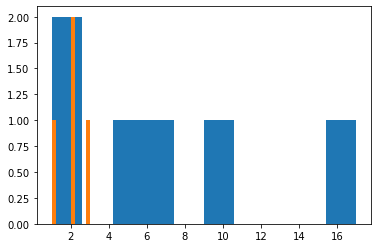

In [31]:
df["cant_juguetes"] = np.where(df["cant_juguetes"] == np.nan, 0, df["cant_juguetes"])

for i in ["edad", "cant_juguetes"]:
    plt.hist(df[i])

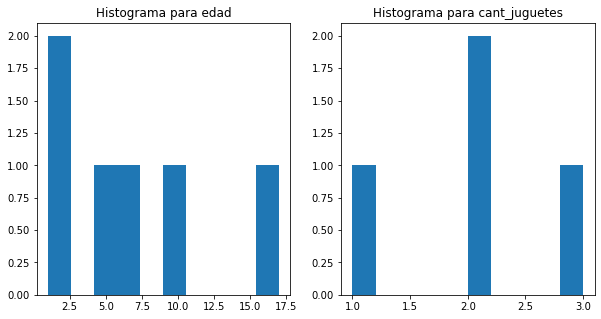

In [158]:
plt.figure(figsize=(10,5)) # ancho, alto
for index, val in enumerate(["edad", "cant_juguetes"]):
    plt.subplot(
        1, # Cantidad de filas.
        2, # Cantidad de columnas.
        index + 1 # Posición de cada gráfico en la grilla (parte en 1): De izk a der, de arriba a abajo
    )
    plt.hist(df[val])
    plt.title("Histograma para " + val)

## Uso 'groupby'

In [159]:
df.groupby("especie")

In [160]:
df.groupby("especie")["edad"]

In [162]:
df.groupby("especie")["edad"].value_counts()

especie  edad
erizo    5       1
gato     10      1
         17      1
perro    2       1
         7       1
ratón    1       1
Name: edad, dtype: int64

In [163]:
df.groupby("especie")["edad"].mean()

especie
erizo     5.0
gato     13.5
perro     4.5
ratón     1.0
Name: edad, dtype: float64

## Uso 'to_csv'

In [164]:
df.to_csv("mascotas.csv") # Ver documentación